In [1]:
import numpy as np
import matplotlib.pyplot as plt

**7. Age of the universe and constraints on cosmological parameters**

Make a 2D figure that shows the dependence of the age of the universe on $\Omega_\mathrm{matter}$ and $\Omega_\Lambda$. Indicate the bounds on this 2D space that are set by age estimates of the Solar system, white dwarfs, and globular clusters. How does the region of $\Omega_\mathrm{matter}$, $\Omega_\Lambda$ that is allowed by these constraints compare with the region favored by other observations? (See your notes from class, figure 3.5 in the text, and the “Cosmic Triangle” article.) Use the equation

$$ t_0 = \frac{2}{3}t_H (0.7\Omega_M + 0.3 - 0.3\Omega_\Lambda)^{-0.3} $$

$$ t_0 = 6.52h^{-1}\mathrm{Gyr}\ (0.7\Omega_M + 0.3 - 0.3\Omega_\Lambda)^{-0.3} $$

which relates the age of the universe now to the Hubble time ($t_H=1/H$) and the cosmological parameters $\Omega_M$ and $\Omega_\Lambda$.

Note that this equation is only valid if $ \Omega_M > \frac{3}{7}(\Omega_\Lambda-1) $

---

In [2]:
def t0(omega_m, omega_vac):
    return (6.52/0.68) * (0.7*omega_m + 0.3 - 0.3*omega_vac)**(-0.3) #take H0=68km/s/Mpc

<ipython-input-2-2c511908b9c7>:2: RuntimeWarning: divide by zero encountered in power
  return (6.52/0.68) * (0.7*omega_m + 0.3 - 0.3*omega_vac)**(-0.3) #take H0=68km/s/Mpc
<ipython-input-2-2c511908b9c7>:2: RuntimeWarning: invalid value encountered in power
  return (6.52/0.68) * (0.7*omega_m + 0.3 - 0.3*omega_vac)**(-0.3) #take H0=68km/s/Mpc


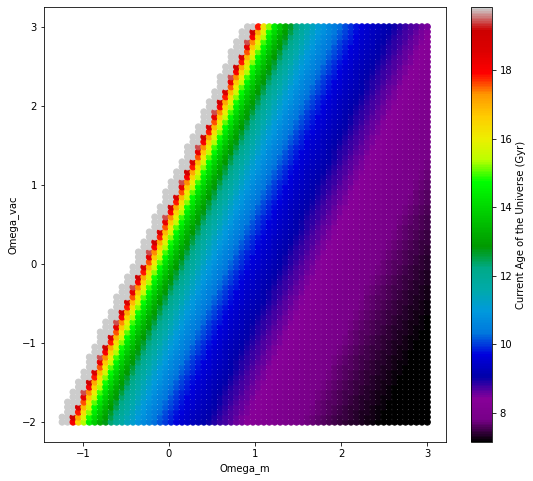

In [3]:
fig = plt.figure(figsize=(9,8))

om_m   = np.linspace(-2, 3, 10)
om_vac = np.linspace(-2, 3, 10)

#Create mesh grid for plotting/colorbar
xmin, xmax = om_m.min(), om_m.max()
ymin, ymax = om_vac.min(), om_vac.max()
X, Y = np.mgrid[xmin:xmax:80j, ymin:ymax:80j]
positions = np.vstack([X.ravel(), Y.ravel()])
t0list = t0(positions[0,:], positions[1,:])

plt.scatter(positions[0,:], positions[1,:], c=t0list, cmap="nipy_spectral", \
           vmin=np.percentile(t0list[~np.isnan(t0list)], 2), vmax=np.percentile(t0list[~np.isnan(t0list)], 96))

cbar = plt.colorbar()
cbar.ax.set_ylabel('Current Age of the Universe (Gyr)')
plt.xlabel("Omega_m")
plt.ylabel("Omega_vac")
plt.show()